In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [4]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2 + 0.9*X + 2 +np.random.rand(200,1)


In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

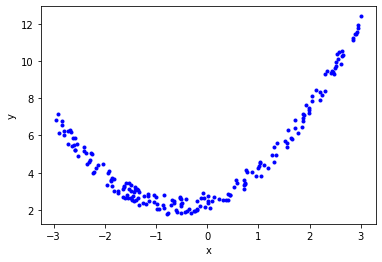

In [6]:
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.36613030510874456

Text(0, 0.5, 'y')

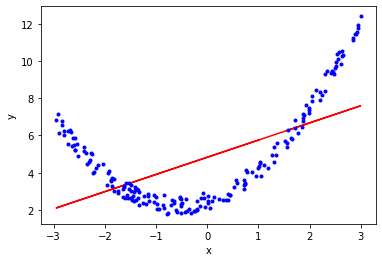

In [11]:
plt.plot(X_train,lr.predict(X_train),'r')
plt.plot(X,y,'b.')
plt.xlabel("x")
plt.ylabel("y")

In [12]:
# PolyNomial regression for degree 2
poly=PolynomialFeatures(degree=2)  # default include_bias=True
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [13]:
print(X_train[0])
print(X_train_trans[0])

[1.01381366]
[1.         1.01381366 1.02781813]


In [14]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test_trans)
r2_score(y_pred,y_test)

0.9884681641344759

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89332118 0.80123267]]
[2.44960782]


In [18]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

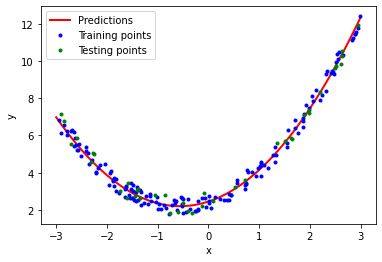

In [19]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,y_train,'b.',label="Training points")
plt.plot(X_test,y_test,'g.',label="Testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [20]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()


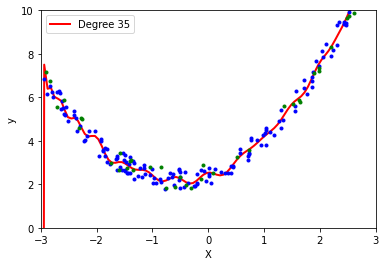

In [24]:
polynomial_regression(35) # for large degree overfitting